[[ 12.  57.  56.]
 [ 12.  57.  57.]
 [ 12.  57.  58.]
 ...
 [118.  67.  62.]
 [118.  67.  63.]
 [118.  67.  64.]]
(44186, 3)


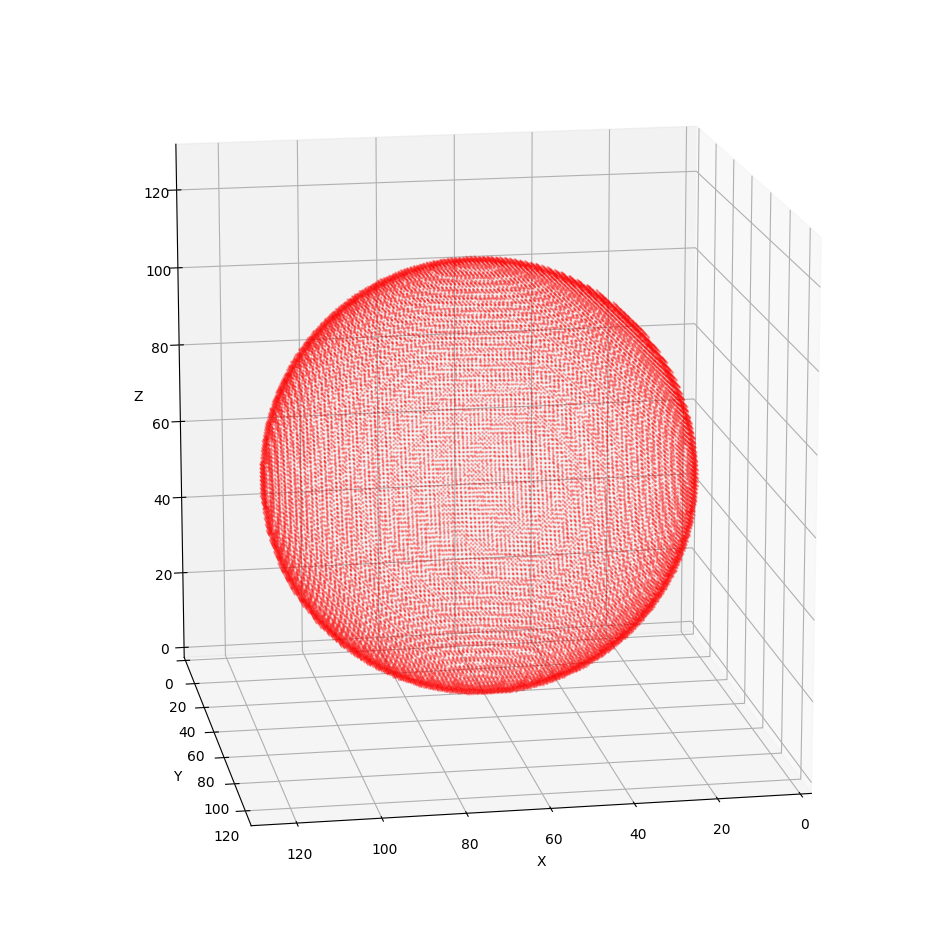

In [794]:
#取得した座標データを表示
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



b = np.loadtxt('C:/Users/ku-admin/Desktop/choten/sphere128.txt', delimiter=',')
b = np.delete(b, 0, axis=1)

X1 = b[:,0]
Y1 = b[:,1]
Z1 = b[:,2]

X1 = np.round(X1)
Y1 = np.round(Y1)
Z1 = np.round(Z1)

virtex = np.vstack((X1, Y1))
virtex = np.vstack((virtex, Z1))
virtex = virtex.T
virtex = np.unique(virtex, axis=0)
print(virtex)
print(virtex.shape)

# Figureを追加
fig = plt.figure(figsize = (12, 12))

# 3DAxesを追加
ax = fig.add_subplot(projection='3d')

# Axesのタイトルを設定
ax.set_title("", size = 20)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,129)
#ax.scatter(X0, Y0, Z0, s = 0.1, c = "blue", alpha = 0.1)
ax.scatter(virtex[:,0], virtex[:,1], virtex[:,2], s = 0.5, c = "red", alpha = 0.3)
ax.view_init(elev=15, azim=80)
ax.set_aspect('equal')
ax.axis("on")

plt.show()


#X,Y,Zを再び行列にして、重複要素を削除(unique)

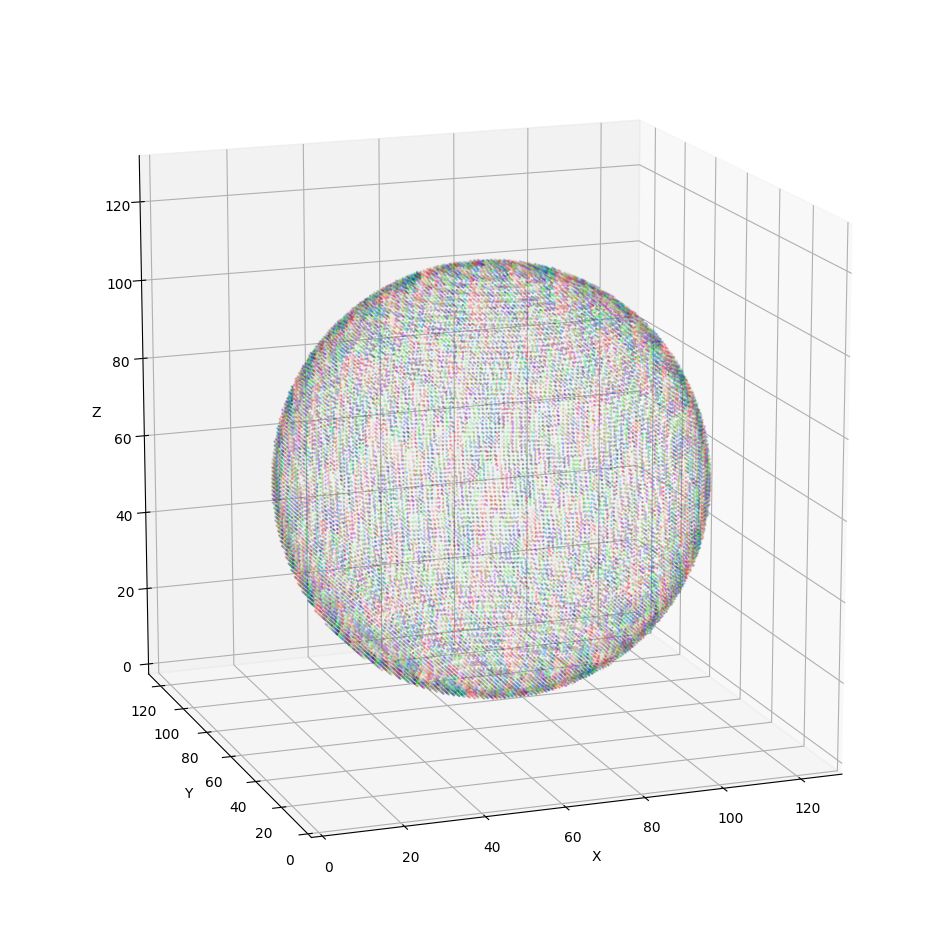

In [1187]:
#128の座標に色情報が入った配列
dot = virtex.shape[0]
   

# n行3列のnumpy配列を生成
color = np.zeros((dot, 3), dtype=int)

# RGB値を設定
for i in range(dot):
    #red = 255 *(dot - i) // (dot)
    #blue = 255 * i // (dot)
    #green = 0
    red = 3*i % 256
    blue = 10*(i+120) % 256
    green = 7*(i+240) % 256

    #red = 255
    #blue = 0
    #green = 0
    color[i] = [red, green, blue]

virtex_color = np.concatenate([virtex, color], 1)
colors = virtex_color[:, 3:6]
colors_seikika = colors/255

#print(virtex_color)
#print(colors)
# Figureを追加
fig = plt.figure(figsize = (12, 12))
# 3DAxesを追加
ax = fig.add_subplot(projection='3d')
# Axesのタイトルを設定
ax.set_title("", size = 20)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,129)
ax.scatter(virtex_color[:,0], virtex_color[:,1], virtex_color[:,2], s = 0.5, c = colors_seikika, alpha = 0.3)
ax.view_init(elev=15, azim=250)
ax.set_aspect('equal')
ax.axis("on")
plt.show()

In [1329]:
gensui0 = 0.5
gensui0_inv = 1/gensui0

zoufuku = np.array([1,1,1,1,1,1,1])
zoufuku_inv = 1/zoufuku

seikika = 4
#テーブルを調整して高周波が消えないようにすれば沢山正規化しても大丈夫かもしれない
#高周波の量子化ビットを小さく、低周波の量子化ビットを大きくする

#量子化
R_Y = 8
R_C = 8

#量子化M
M = 0.25
M00 = 1
mukou = 0

#量子化2
second = 4
#効果あり

#一回目のIDCTが終わった時点で63を超えていしまっている

In [1330]:
#量子化テーブルの作成
import numpy as np

tableY = np.zeros((8,8))
ryoshi_Y = np.array([[16,  11,  10,  16,  24,  40,  51,  61 ],
[ 12,  12,  14,  19,  26,  58,  60,  55 ],
[ 14,  13,  16,  24,  40,  57,  69,  56 ],
[ 14,  17,  22,  29,  51,  87,  80,  62 ],
[ 18,  22,  37,  56,  68, 109, 103,  77 ],
[ 24,  35,  55,  64,  81, 104, 113,  92 ],
[ 49,  64,  78,  87, 103, 121, 120, 101 ],
[ 72,  92,  95,  98, 112, 100, 103,  99 ]])

ryoshi_Y_8bit = np.array([[16,  11,  10,  16,  24,  40,  51,  61 ],
[ 12,  12,  14,  19,  26,  58,  60,  55 ],
[ 14,  13,  16,  24,  40,  57,  69,  56 ],
[ 14,  17,  22,  29,  51,  87,  80,  62 ],
[ 18,  22,  37,  56,  68, 109, 103,  77 ],
[ 24,  35,  55,  64,  81, 104, 113,  92 ],
[ 49,  64,  78,  87, 103, 121, 120, 101 ],
[ 72,  92,  95,  98, 112, 100, 103,  99 ]])

"""
k = 0.5  # ここでk倍する値を設定
# 要素の位置に応じて値を増やす
for i in range(ryoshi_Y_8bit.shape[0]):
    for j in range(ryoshi_Y_8bit.shape[1]):
        ryoshi_Y_8bit[i, j] = ryoshi_Y_8bit[i, j] * (1 + k * (i+j))
"""

ryoshi_Y_8bit[ryoshi_Y_8bit>160] =160

tableY = ryoshi_Y_8bit//R_Y
tableY = tableY.astype(np.int16)
tableY[tableY < 1] = 1
print(tableY)



tableC = np.zeros((8,8))
ryoshi_C = np.array([[17,  18,  24,  47,  99,  99,  99 , 99 ],
[ 18,  21,  26,  66,  99,  99,  99,  99 ],
[ 24,  26,  56,  99,  99,  99,  99,  99 ],
[ 47,  66,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ]])

ryoshi_C_8bit = np.array([[17,  18,  24,  47,  99,  99,  99 , 99 ],
[ 18,  21,  26,  66,  99,  99,  99,  99 ],
[ 24,  26,  56,  99,  99,  99,  99,  99 ],
[ 47,  66,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ]])

"""
for i in range(ryoshi_C_8bit.shape[0]):
    for j in range(ryoshi_C_8bit.shape[1]):
        ryoshi_C_8bit[i, j] = ryoshi_C_8bit[i, j] * (1 + k * (i+j))
"""
ryoshi_C_8bit[ryoshi_C_8bit>160] =160

tableC = ryoshi_C_8bit//R_C
tableC = tableC.astype(np.int16)
tableC[tableC<1] =1
print(tableC)

"""
tableM = np.array([[17,  18,  24,  47,  99,  99,  99 , 99 ],
[ 18,  21,  26,  66,  99,  99,  99,  99 ],
[ 24,  26,  56,  99,  99,  99,  99,  99 ],
[ 47,  66,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ]])"""
tableM = np.ones((8,8))
tableM = tableM//M
#tableM[0,:] = M00*M
tableM = tableM.astype(np.int16)
tableM[tableM<1] =1
if (mukou): tableM = tableM = np.ones((8,8))
print(tableM)

table2 = np.ones((8,8))
table2 = table2*second
table2 = table2.astype(np.int16)
print(table2)

#量子化テーブルの値は8ビットまでにする必要がある
#このままだとこえてる　１６ならいける
#二個のテーブルに分けて二回かけるとかにすれば8ビットにおさめられる？
#それか、８びっとで収まるようにして、それで十分に圧縮できればそれでいいかも

[[ 2  1  1  2  3  5  6  7]
 [ 1  1  1  2  3  7  7  6]
 [ 1  1  2  3  5  7  8  7]
 [ 1  2  2  3  6 10 10  7]
 [ 2  2  4  7  8 13 12  9]
 [ 3  4  6  8 10 13 14 11]
 [ 6  8  9 10 12 15 15 12]
 [ 9 11 11 12 14 12 12 12]]
[[ 2  2  3  5 12 12 12 12]
 [ 2  2  3  8 12 12 12 12]
 [ 3  3  7 12 12 12 12 12]
 [ 5  8 12 12 12 12 12 12]
 [12 12 12 12 12 12 12 12]
 [12 12 12 12 12 12 12 12]
 [12 12 12 12 12 12 12 12]
 [12 12 12 12 12 12 12 12]]
[[4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]]
[[4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]]


In [1305]:
#DCTIDCT

import numpy as np
import matplotlib.pyplot as plt

#コサイン定数の定義
"""
C13 = -0.831469612
C9 = -0.195090322
C5 = 0.555570233
"""
C13 = -1
C9 = -0.25
C5 = 0.5
#シフト演算のみでできるように

#課題：ハードウェアでやる場合の誤差伝搬をどう少なくするか

C5_inv = 1/C5
C9_inv = 1/C9
C13_inv = 1/C13


#8*8*8を生成(8*8の同じ画像を8枚)
#ランダム
"""
x_in1 = np.random.rand(8,8,8)*255
x_in1 = x_in1.astype(np.int64)
"""
#自作

X_out1 = np.zeros((8,8,8))
X_out2 = np.zeros((8,8,8))
X_out3 = np.zeros((8,8,8))
x_in2 = np.zeros((8,8,8))
x_in3 = np.zeros((8,8,8))
x_in3i = np.zeros((8,8,8))
x_in2i = np.zeros((8,8,8))
x_in1i = np.zeros((8,8,8))
X_out1i = np.zeros((8,8,8))
X_out2i = np.zeros((8,8,8))


def butterfly_1(x):
    X = np.zeros(8)
    X[0] = x[0] + x[1]
    X[1] = x[2] + x[3]
    X[2] = x[0] - x[1]
    X[3] = x[2] - x[3]
    X[4] = x[4] + x[5]
    X[5] = x[6] + x[7]
    X[6] = x[4] - x[5]
    X[7] = x[6] - x[7]
    return X

def butterfly_2(x):
    X = np.zeros(8)
    X[0] = x[0] + x[1]
    X[1] = x[4] + x[5]
    X[2] = x[2] + x[3]
    X[3] = x[6] + x[7]
    X[4] = x[0] - x[1]
    X[5] = x[4] - x[5]
    X[6] = x[2] - x[3]
    X[7] = x[6] - x[7]
    return X

def butterfly_3(x):
    X = np.zeros(8)
    X[0] = x[0] + x[1]
    X[1] = x[0] - x[1]
    X[2] = x[2] + x[3]
    X[3] = x[2] - x[3]
    X[4] = x[4] + x[5]
    X[5] = x[4] - x[5]
    X[6] = x[6] + x[7]
    X[7] = x[6] - x[7]
    return X

def cosine(x):
    X = np.zeros(8)
    X[0] = x[0]*gensui0
    X[1] = x[1]*C13
    X[2] = x[2]*C9
    X[3] = x[3]*C9*C13
    X[4] = x[4]*C5
    X[5] = x[5]*C13*C5
    X[6] = x[6]*C9*C5
    X[7] = x[7]*C13*C9*C5
    X[1:8] = X[1:8] * zoufuku
    return X

def Ibutterfly_1(X):
    x = np.zeros(8).astype(np.int8)
    x[0] = 0.5*X[0] + 0.5*X[2]
    x[1] = 0.5*X[0] - 0.5*X[2]
    x[2] = 0.5*X[1] + 0.5*X[3]
    x[3] = 0.5*X[1] - 0.5*X[3]
    x[4] = 0.5*X[4] + 0.5*X[6]
    x[5] = 0.5*X[4] - 0.5*X[6]
    x[6] = 0.5*X[5] + 0.5*X[7]
    x[7] = 0.5*X[5] - 0.5*X[7]
    return x

def Ibutterfly_2(X):
    x = np.zeros(8).astype(np.int8)
    x[0] = 0.5*X[0] + 0.5*X[4]
    x[1] = 0.5*X[0] - 0.5*X[4]
    x[2] = 0.5*X[2] + 0.5*X[6]
    x[3] = 0.5*X[2] - 0.5*X[6]
    x[4] = 0.5*X[1] + 0.5*X[5]
    x[5] = 0.5*X[1] - 0.5*X[5]
    x[6] = 0.5*X[3] + 0.5*X[7]
    x[7] = 0.5*X[3] - 0.5*X[7]
    return x

def Ibutterfly_3(X):
    x = np.zeros(8).astype(np.int8)
    x[0] = 0.5*X[0] + 0.5*X[1]
    x[1] = 0.5*X[0] - 0.5*X[1]
    x[2] = 0.5*X[2] + 0.5*X[3]
    x[3] = 0.5*X[2] - 0.5*X[3]
    x[4] = 0.5*X[4] + 0.5*X[5]
    x[5] = 0.5*X[4] - 0.5*X[5]
    x[6] = 0.5*X[6] + 0.5*X[7]
    x[7] = 0.5*X[6] - 0.5*X[7]
    return x

#多分ここがわるい(おおきくなってしまうため)
def inv_cosine(X):
    x = np.zeros(8).astype(np.int8)
    x[0] = X[0] * gensui0_inv
    x[1] = X[1] * C13_inv
    x[2] = X[2] * C9_inv
    x[3] = X[3] * (C9_inv * C13_inv)
    x[4] = X[4] * C5_inv
    x[5] = X[5] * (C5_inv * C13_inv)
    x[6] = X[6] * (C5_inv * C9_inv)
    x[7] = X[7] * (C5_inv * C9_inv * C13_inv)
    x[1:8] = x[1:8] * zoufuku_inv
    return x

def DCT1(x_in):
    X_1 = butterfly_1(x_in)
    X_2 = butterfly_2(X_1)
    X_3 = butterfly_3(X_2)
    X_out = cosine(X_3)
    return X_out

def IDCT1(X_out):
    X_3 = inv_cosine(X_out).astype(np.int8)
    X_2 = Ibutterfly_3(X_3).astype(np.int8)
    X_1 = Ibutterfly_2(X_2).astype(np.int8)
    x = Ibutterfly_1(X_1).astype(np.int8)
    return x

def DCT(x_in):
    for i in range(8):
        x = x_in[i]
        X_out = DCT1(x)
        x_in[i] = X_out
    return x_in
    
def IDCT(X_out):
    for i in range(8):
        X = X_out[i]
        x = IDCT1(X_out)
        X_out[i] = x
    return X_out


def tenchi2D(x):
    x = np.transpose(x)
    return x


def DCT_2D(x_in1, X_out1, x_in2, X_out2):
    # ｘ方向   
    for i in range(8):
        X_out1[i] = DCT1(x_in1[i])
    #転置
    x_in2 = tenchi2D(X_out1)
    #ここで一旦量子化する
    x_in2 = x_in2/tableM
    #ｙ方向
    for i in range(8):
        X_out2[i] = DCT1(x_in2[i])
    return X_out2

    
def IDCT_2D(X_out2i, x_in2i, X_out1i, x_in1i, n):
    for i in range(8):
        x_in2i[i] = IDCT1(X_out2i[i])
    #転置
    X_out1i = tenchi2D(x_in2i).astype(np.int8)
    #ここでMの復元をする
    X_out1i = X_out1i*(tableM).astype(np.int8)

    #いったんここで63越えを63にしてやる(-64も)
    """
    X_out1i[X_out1i>63] = 63
    X_out1i[X_out1i<-64] = -64
    """
    # ｘ方向
    if n == 1:
        print(X_out1i)   
    
    for i in range(8):
        x_in1i[i] = IDCT1(X_out1i[i])
    x_in1i = x_in1i.astype(np.int8)
    if n == 1:
        print(x_in1i)
    return x_in1i

[[32 -6 -1  2 -3 -5  0  0]
 [-1  3 -2 -2  6 -7  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0 -2  0  0 -8  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
[[ 28 -10   0   0   0 -12   0   0]
 [  0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0 -12   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]
[[ 30   4   0   0   0   0   0   0]
 [  0   2   0   0   0 -12   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]
[[ 40   8   0   0  -4   0   0   0]
 [ 28   8   0   0  -4   0   0   0]
 [ 36 -12   0   0   8   0   0   0]
 [ 24 -12   0   0   8   0   0   0]
 [ 16   8   0   0  -8   0   0   0]
 [ 20  -8   0   0  -8   0   0   0]
 [ 32   8  

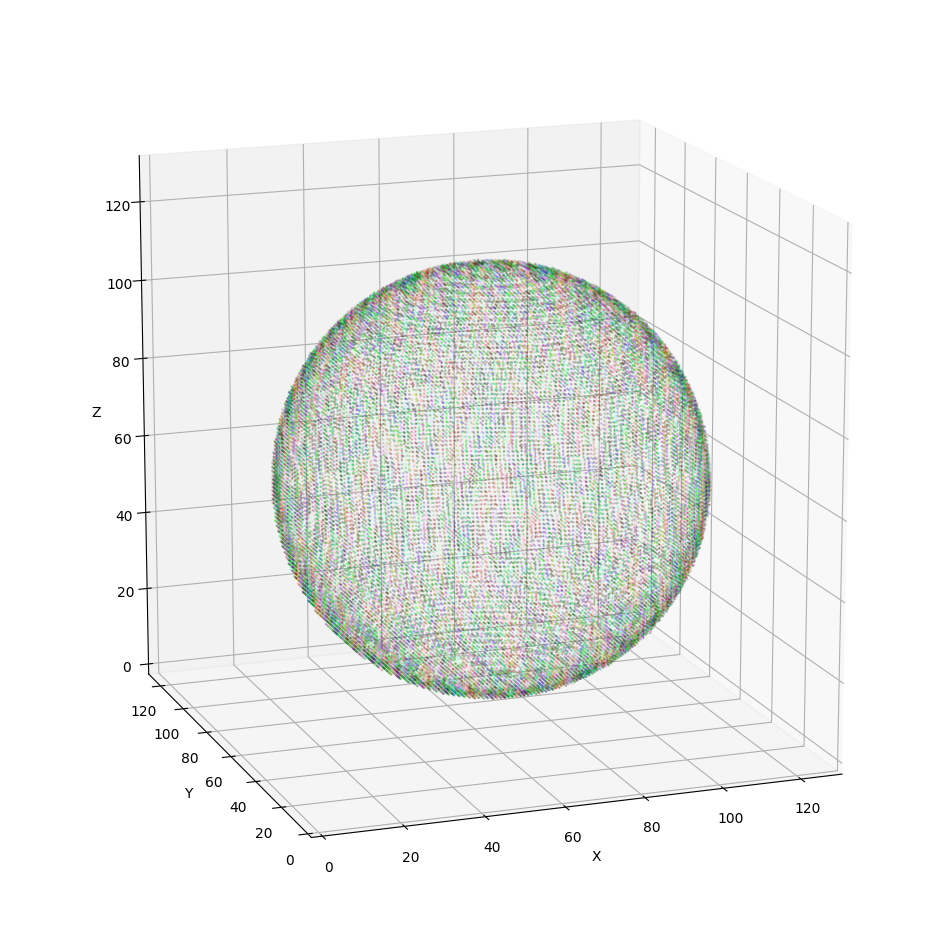

In [1331]:
import numpy as np
import cv2

#8*8ずつ
X_out1 = np.zeros((8,8))
X_out2 = np.zeros((8,8))
x_in2 = np.zeros((8,8))
x_in2i = np.zeros((8,8))
x_in1i = np.zeros((8,8))
X_out1i = np.zeros((8,8))
X_out2i = np.zeros((8,8))
nonzeroY = np.array([])
saidaiY = np.array([])
nonzeroCr = np.array([])
saidaiCr = np.array([])
nonzeroCb = np.array([])
saidaiCb = np.array([])

#成分の入れ替え
colors_BGR = colors[:, ::-1]

#実験：小さい範囲に正規化する
#この場合量子化テーブルを小さくする必要がある
#正規化するのはRGBじゃなくてYCrCbのほうがいいかも
colors_BGR = colors_BGR
#print(colors_BGR)

colors_add = np.zeros((64,3))
colors_BGR = np.concatenate([colors_BGR, colors_add], 0).astype(np.uint8)

#枚数を計算
maisu = dot//64 + 1

#発光デバイスを8*8ごとに分割
colors88 = np.zeros((maisu,8,8,3))
k = 0
for m in range(maisu):
    for i in range(8):
        for j in range(8):
            colors88[m,i,j] = colors_BGR[k]
            k = k + 1

#データ形式をuint8に変換
colors88 = colors88.astype(np.uint8)
"""cv2.namedWindow("Image1", cv2.WINDOW_NORMAL)
cv2.imshow("Image1", colors88[dot//64,:,:,:])
cv2.waitKey()"""


#色変換，要素ごとに分割
for i in range(maisu):
    colors88[i,:,:,:] = cv2.cvtColor(colors88[i,:,:,:], cv2.COLOR_BGR2YCrCb)
Y = colors88[:,:,:,0].astype(np.float16)
Cr = colors88[:,:,:,1].astype(np.float16)
Cb = colors88[:,:,:,2].astype(np.float16)

#実験：正規化
Y = Y/seikika
Cr = Cr/seikika
Cb = Cb/seikika
#print(Y[0,:,:])

#変換，量子化
for i in range(maisu):
    Y[i,:,:] = DCT_2D(Y[i,:,:], X_out1, x_in2, X_out2)
    Cr[i,:,:] = DCT_2D(Cr[i,:,:], X_out1, x_in2, X_out2)
    Cb[i,:,:] = DCT_2D(Cb[i,:,:], X_out1, x_in2, X_out2)
    #print(Y[0,:,:])
    Y[i,:,:] = Y[i,:,:]/tableY
    Cr[i,:,:] = Cr[i,:,:]/tableC
    Cb[i,:,:] = Cb[i,:,:]/tableC
    Y[i,:,:] = Y[i,:,:].astype(np.int64)
    Cr[i,:,:] = Cr[i,:,:].astype(np.int64)
    Cb[i,:,:] = Cb[i,:,:].astype(np.int64)

    saidaiY = np.append(saidaiY, np.amax(Y[i,:,:]))
    saidaiCr = np.append(saidaiCr, np.amax(Cr[i,:,:]))
    saidaiCb = np.append(saidaiCb, np.amax(Cb[i,:,:]))

    nonzeroY = np.append(nonzeroY, (np.count_nonzero(Y[i,:,:])))
    nonzeroCr = np.append(nonzeroCr, (np.count_nonzero(Cr[i,:,:])))
    nonzeroCb = np.append(nonzeroCb, (np.count_nonzero(Cb[i,:,:])))

    #if i == 0:
        #print(Y[0,:,:])
        #print(saidaiY)
        #print(nonzeroY)

#量子化2
for i in range(maisu):
    Y[i,:,:] = Y[i,:,:]//table2
    Cr[i,:,:] = Cr[i,:,:]//table2
    Cb[i,:,:] = Cb[i,:,:]//table2

#ここからは整数しか使えない
#嘘、まだ大丈夫
"""
Y = Y.astype(np.int8)
Cr = Cr.astype(np.int8)
Cb = Cb.astype(np.int8)"""

#復元
for i in range(maisu):
    Y[i,:,:] = Y[i,:,:]*tableY
    Cr[i,:,:] = Cr[i,:,:]*tableC
    Cb[i,:,:] = Cb[i,:,:]*tableC


#ここでオーバーフロー検出する
for i in range(maisu):
    Y[Y>63] = 63
    Cr[Cr>63] = 63
    Cb[Cb>63] = 63
    Y[Y<-64] = -64
    Cr[Cr<-64] = -64
    Cb[Cb<-64] = -64


#ここから先をマイコンに送る？(どうせ１２７超えたらオーバーフローなので) かつ乗算をなくせる   
Y = Y.astype(np.int8)
Cr = Cr.astype(np.int8)
Cb = Cb.astype(np.int8)
#ここから先は整数しか使えない

for i in range(maisu):
    if i == 1:
        print(Y[i,:,:])
        print(Cr[i,:,:])
        print(Cb[i,:,:])
    Y[i,:,:] = IDCT_2D(Y[i,:,:], X_out1, x_in2, X_out2, i)
    Cr[i,:,:] = IDCT_2D(Cr[i,:,:], X_out1, x_in2, X_out2, i)
    Cb[i,:,:] = IDCT_2D(Cb[i,:,:], X_out1, x_in2, X_out2, i)

#uintに変換，YCrCb結合


#復号2
for i in range(maisu):
    Y[i,:,:] = Y[i,:,:]*table2
    Cr[i,:,:] = Cr[i,:,:]*table2
    Cb[i,:,:] = Cb[i,:,:]*table2

Y = Y.astype(np.uint8)
Cr = Cr.astype(np.uint8)
Cb = Cb.astype(np.uint8)

#実験：正規化をもとに戻す
Y = Y*seikika
Cr = Cr*seikika
Cb = Cb*seikika

Y[Y<0] = 0
Cr[Cr<0] = 0
Cb[Cb<0] = 0
Y[Y>255] = 255
Cr[Cr>255] = 255
Cb[Cb>255] = 255


Y_recrypt = Y.astype(np.uint8)
Cr_recrypt = Cr.astype(np.uint8)
Cb_recrypt = Cb.astype(np.uint8)
#print(Y_recrypt[0,:,:])
colors88_recrypt = np.stack([Y_recrypt, Cr_recrypt, Cb_recrypt],-1)

#BGRに変換
for i in range(maisu):
    colors88_recrypt[i,:,:,:] = cv2.cvtColor(colors88_recrypt[i,:,:,:], cv2.COLOR_YCrCb2BGR)

#8*8から一列に
colors_BGR_recrypt = np.zeros((dot + 64,3))
k = 0
for m in range(maisu):
    for i in range(8):
        for j in range(8):
            colors_BGR_recrypt[k] = colors88_recrypt[m,i,j]
            k = k + 1


#実験：正規化した分を元に戻す

#表示できるように
colors_RGB_recrypt = colors_BGR_recrypt[:, ::-1]
colors_RGB_recrypt = colors_RGB_recrypt[0:dot, :]
colors_RGB_recrypt = colors_RGB_recrypt.astype(np.int16)
virtex = virtex.astype(np.int16)
virtex_colors_recrypt = np.concatenate([virtex, colors_RGB_recrypt], -1)
colors_recrypt = virtex_colors_recrypt[:,3:6]
colors_recrypt_seikika = colors_recrypt/255
#print(virtex_colors_recrypt)

print(np.max(saidaiY))
print(np.max(saidaiCr))
print(np.max(saidaiCb))
print("\n")
print(np.sum(nonzeroY))
print(np.sum(nonzeroCr))
print(np.sum(nonzeroCb))


#像の表示
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(projection='3d')
ax.set_title("", size = 20)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,129)
ax.scatter(virtex_colors_recrypt[:,0], virtex_colors_recrypt[:,1], virtex_colors_recrypt[:,2], s = 0.5, c = colors_recrypt_seikika, alpha = 0.3)
ax.view_init(elev=15, azim=250)
ax.set_aspect('equal')
ax.axis("on")
plt.show()

#逆の操作をして元の配列に色を戻して表示する
#DCT量子化後の配列の０でない要素の値の数を調べる